**Note:** This notebook covers the initial data curation, descriptor calculation, preprocessing, early model building, and cluster-based splitting for the CETP inhibitor project. It serves as the starting point for further analysis and model development.

**Acknowledgements:** This notebook was built upon the foundational work and QSAR assistance provided by Dr. Sina Khosravi.

# Brief Overview of CETP and Its Inhibitors

Cholesteryl Ester Transfer Protein (CETP) is a plasma protein that facilitates the transfer of cholesteryl esters and triglycerides between lipoproteins. CETP mainly transfers cholesteryl esters from HDL (the "good" cholesterol) to VLDL and LDL (the "bad" cholesterol), affecting blood lipid balance and the risk of cardiovascular diseases.

CETP inhibitors are drugs that block this protein, leading to increased HDL-C levels and decreased LDL-C levels. The main goal of these drugs is to reduce cardiovascular risk by improving the blood lipid profile.

## Current Challenges of CETP Inhibitors

- Failure in clinical trials: Several CETP inhibitors (such as torcetrapib, dalcetrapib, and evacetrapib) have been discontinued due to insufficient efficacy or serious side effects (e.g., increased blood pressure and higher mortality with torcetrapib).
- Limited effectiveness: Some drugs, despite increasing HDL-C, failed to significantly reduce cardiovascular events (such as dalcetrapib and evacetrapib).
- Side effects: Torcetrapib was associated with increased blood pressure and mortality, attributed to off-target effects. Other drugs also showed mild increases in blood pressure.
- Genetic response variability: Recent studies have shown that the response to some inhibitors (like dalcetrapib) may depend on the genetic profile of patients, with only certain subgroups benefiting.
- Lack of final approval: Even a drug like anacetrapib, which showed moderate reductions in coronary events in the REVEAL trial, was not pursued for FDA approval due to concerns about efficacy and safety.

## FDA-Approved CETP Inhibitors

To date, no CETP inhibitor has been approved by the FDA. All major drugs in this class (torcetrapib, dalcetrapib, evacetrapib, anacetrapib) have been discontinued due to side effects or lack of sufficient efficacy and have not reached the market.

A newer drug, obicetrapib, is currently in advanced clinical trials and has shown promising initial results, but it has not yet received FDA approval.

## Summary

CETP plays a key role in regulating blood lipids and is an attractive target for cardiovascular disease treatment.

CETP inhibitors have faced significant efficacy and safety challenges, and none have been approved by the FDA so far.

Research continues on newer compounds and identifying suitable patient subgroups for these therapies.

---


### Simplified Molecular-Input Line-entry System: SMILES

SMILES stands for "Simplified Molecular-Input Line-Entry System" and is a way to represent molecules as a string of characters.

Consider the molecule ethanol. The image below shows a representation that we are used to seeing in chemistry:

<img src="https://github.com/MolSSI-Education/molssicheminfo/blob/master/images/ethanol.png?raw=true" style="display: block; margin: 0 auto; max-height:200px;">

However, the SMILES representation of this molecule would be "CCO".

You can read more about SMILES at [this tutorial](https://archive.epa.gov/med/med_archive_03/web/html/smiles.html), but rules for atoms and bonds are also repeated below.

### Atoms
SMILES supports all elements in the periodic table. An atom is represented using its respective atomic symbol. Upper case letters refer to non-aromatic atoms; lower case letters refer to aromatic atoms. If the atomic symbol has more than one letter the second letter must be lower case.

### Bonds
```
-	Single bond
=	Double bond
#	Triple bond
*	Aromatic bond
.	Disconnected structures
```
Single bonds are the default and therefore need not be entered. For example, 'CC' would mean that there is a non-aromatic carbon attached to another non-aromatic carbon by a single bond, and the computer would identify the structure as the chemical ethane. It is also assumed that the bond between two lower case atom symbols is aromatic. A blank terminates the SMILES string.

### Branches

A branch from a chain is specified by placing the SMILES symbol(s) for the branch between parenthesis. Some examples:

```

CC(O)C	2-Propanol
CC(=O)C	2-Propanone
```

### Rings

A ring is specified by placing a number directly after the SMILES symbol where the ring closure occurs. This number acts as a marker, indicating that the atoms with the same number are connected, thus forming a ring. For instance:

```
C1CCCC1   cyclopentane
n1ccccc1  Pyridine
```

### SMILES Examples

<div style="text-align:center;">
  <img src="https://github.com/MolSSI-Education/molssicheminfo/blob/master/images/smiles_example_1.png?raw=true" style="display: block; margin: 0 auto; max-height:300px;">
</div>

<div style="text-align:center;">
  <img src="https://github.com/MolSSI-Education/molssicheminfo/blob/master/images/smiles_example_2.png?raw=true" style="display: block; margin: 0 auto; max-height:300px;">
</div>

### Using Online Resources
Most of the time, you will not need to write a SMILES string by hand. You will be able to look up a molecule's SMILES string from a web database like [PubChem](https://pubchem.ncbi.nlm.nih.gov/).

You can also use tools like this [molecule sketcher from the Protein Data Bank](https://www.rcsb.org/chemical-sketch)
to draw molecules and get their SMILES strings.

In [ ]:
! pip install chembl_webresource_client
! pip install rdkit
! pip install seaborn
! pip install matplotlib
! pip install datamol
! pip install scikit-fingerprints
! pip install sklearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.4/495.4 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.0/357.0 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: rdkit
    Found existing in

In [ ]:
from chembl_webresource_client.new_client import new_client
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm


tqdm.pandas(desc="Processing") # tqdm will display a progress bar with the description "Processing" as the operation runs. This is very useful for tracking the progress of time-consuming operations on large datasets.
pd.set_option('display.max_colwidth', 100) # It configures the maximum width of columns in the DataFrame display to 100 characters.


In [ ]:
# This sends a request to the ChEMBL database to find targets related to CETP.
# The result of this search, which is likely a list of dictionaries.
target = new_client.target.search("CETP")

# the code converts the search results into a structured format called a DataFrame.
# DataFrames are provided by the pandas library and are essentially like tables.
# each dictionary becomes a row and the keys of the dictionaries become the column names.
target_df = pd.DataFrame.from_dict(target)
target_df

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Cholesteryl ester transfer protein,18.0,False,CHEMBL3572,"[{'accession': 'P11597', 'component_description': 'Cholesteryl ester transfer protein', 'compone...",SINGLE PROTEIN,9606
1,[],Oryctolagus cuniculus,Cholesteryl ester transfer protein,18.0,False,CHEMBL1163116,"[{'accession': 'P22687', 'component_description': 'Cholesteryl ester transfer protein', 'compone...",SINGLE PROTEIN,9986


In [ ]:
# Fetching Biological Activity Data
target_id = target_df.loc[0, 'target_chembl_id'] # extracts the target_chembl_id from the first row of the target_df DataFrame.

bio_activity = new_client.activity.search(target_id) # sends a request to the database and fetches relevant activity data.
bio_activity_df = pd.DataFrame.from_dict(bio_activity) # converted into a pandas DataFrame

In [ ]:
bio_activity_df.columns

Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

**Below here, we generate our labaled data by keep descriptions of each molecule with its label in a dataframe!**

We don't need other columns because we will add descriptors in the next part.

IC50 (Half Maximal Inhibitory Concentration) is a common measure of how much of a particular substance (in this case, a potential drug) is needed to inhibit a biological process by half.

In [ ]:
selected_col = ['molecule_chembl_id', 'canonical_smiles', 'standard_type', 'standard_value']

In [ ]:
df = bio_activity_df.loc[bio_activity_df['standard_type']=='IC50', selected_col]
df

,molecule_chembl_id,canonical_smiles,standard_type,standard_value
0,CHEMBL125473,OC(CN(Cc1cccc(C(F)(F)F)c1)c1cccc(F)c1)C(F)(F)F,IC50,37000.0
3,CHEMBL128218,Cc1ccccc1CN(CC(O)C(F)(F)F)c1cccc(F)c1,IC50,100000.0
4,CHEMBL127895,OC(CN(Cc1cccc(OC(F)(F)F)c1)c1cccc(Oc2ccccc2)c1)C(F)(F)F,IC50,40000.0
5,CHEMBL337966,CC(C)Cc1cccc(CN(CC(O)C(F)(F)F)c2cccc(Oc3ccccc3)c2)c1,IC50,540.0
6,CHEMBL340310,O[C@@H](CN(Cc1cccc(OC(F)(F)C(F)F)c1)c1cccc(Oc2ccccc2)c1)C(F)(F)F,IC50,800.0
...,...,...,...,...
2413,CHEMBL4862151,COc1cc(F)c(C(C)C)cc1-c1ccc(C(F)(F)F)cc1[C@@H]1CC[C@H]2[C@@H](c3cc(C(F)(F)F)cc(C(F)(F)F)c3)SC(=O)N12,IC50,170.0
2418,CHEMBL1800807,COc1cc(F)c(C(C)C)cc1-c1ccc(C(F)(F)F)cc1CN1C(=O)O[C@H](c2cc(C(F)(F)F)cc(C(F)(F)F)c2)[C@@H]1C,IC50,17.0
2419,CHEMBL4849688,COc1ccc(-c2ccccc2C(=O)O)cc1-c1ccc(C(F)(F)F)cc1CN1C(=O)O[C@H](c2cc(C(F)(F)F)cc(C(F)(F)F)c2)[C@@H]1C,IC50,3060.0
2420,CHEMBL4876714,CC(C)c1cc(-c2ccc(C(F)(F)F)cc2CN2C(=O)O[C@H](c3cc(C(F)(F)F)cc(C(F)(F)F)c3)[C@@H]2C)c(Cl)cc1F,IC50,30.4


In [ ]:
# Missing data?
df.isna().sum()

,0
molecule_chembl_id,0
canonical_smiles,0
standard_type,0
standard_value,162


In [ ]:
# In chem, we can't keep missing values and fill them with any other value
# So let's delete them!
df = df.dropna()
print(df.isna().sum())

df

molecule_chembl_id    0
canonical_smiles      0
standard_type         0
standard_value        0
dtype: int64


,molecule_chembl_id,canonical_smiles,standard_type,standard_value
0,CHEMBL125473,OC(CN(Cc1cccc(C(F)(F)F)c1)c1cccc(F)c1)C(F)(F)F,IC50,37000.0
3,CHEMBL128218,Cc1ccccc1CN(CC(O)C(F)(F)F)c1cccc(F)c1,IC50,100000.0
4,CHEMBL127895,OC(CN(Cc1cccc(OC(F)(F)F)c1)c1cccc(Oc2ccccc2)c1)C(F)(F)F,IC50,40000.0
5,CHEMBL337966,CC(C)Cc1cccc(CN(CC(O)C(F)(F)F)c2cccc(Oc3ccccc3)c2)c1,IC50,540.0
6,CHEMBL340310,O[C@@H](CN(Cc1cccc(OC(F)(F)C(F)F)c1)c1cccc(Oc2ccccc2)c1)C(F)(F)F,IC50,800.0
...,...,...,...,...
2413,CHEMBL4862151,COc1cc(F)c(C(C)C)cc1-c1ccc(C(F)(F)F)cc1[C@@H]1CC[C@H]2[C@@H](c3cc(C(F)(F)F)cc(C(F)(F)F)c3)SC(=O)N12,IC50,170.0
2418,CHEMBL1800807,COc1cc(F)c(C(C)C)cc1-c1ccc(C(F)(F)F)cc1CN1C(=O)O[C@H](c2cc(C(F)(F)F)cc(C(F)(F)F)c2)[C@@H]1C,IC50,17.0
2419,CHEMBL4849688,COc1ccc(-c2ccccc2C(=O)O)cc1-c1ccc(C(F)(F)F)cc1CN1C(=O)O[C@H](c2cc(C(F)(F)F)cc(C(F)(F)F)c2)[C@@H]1C,IC50,3060.0
2420,CHEMBL4876714,CC(C)c1cc(-c2ccc(C(F)(F)F)cc2CN2C(=O)O[C@H](c3cc(C(F)(F)F)cc(C(F)(F)F)c3)[C@@H]2C)c(Cl)cc1F,IC50,30.4


In [ ]:
# Let's have better names!
df.columns = ['Name', 'Smiles', 'type', 'IC50']

# With better index it would look better!
df.reset_index(drop=True, inplace=True)

df

,Name,Smiles,type,IC50
0,CHEMBL125473,OC(CN(Cc1cccc(C(F)(F)F)c1)c1cccc(F)c1)C(F)(F)F,IC50,37000.0
1,CHEMBL128218,Cc1ccccc1CN(CC(O)C(F)(F)F)c1cccc(F)c1,IC50,100000.0
2,CHEMBL127895,OC(CN(Cc1cccc(OC(F)(F)F)c1)c1cccc(Oc2ccccc2)c1)C(F)(F)F,IC50,40000.0
3,CHEMBL337966,CC(C)Cc1cccc(CN(CC(O)C(F)(F)F)c2cccc(Oc3ccccc3)c2)c1,IC50,540.0
4,CHEMBL340310,O[C@@H](CN(Cc1cccc(OC(F)(F)C(F)F)c1)c1cccc(Oc2ccccc2)c1)C(F)(F)F,IC50,800.0
...,...,...,...,...
1949,CHEMBL4862151,COc1cc(F)c(C(C)C)cc1-c1ccc(C(F)(F)F)cc1[C@@H]1CC[C@H]2[C@@H](c3cc(C(F)(F)F)cc(C(F)(F)F)c3)SC(=O)N12,IC50,170.0
1950,CHEMBL1800807,COc1cc(F)c(C(C)C)cc1-c1ccc(C(F)(F)F)cc1CN1C(=O)O[C@H](c2cc(C(F)(F)F)cc(C(F)(F)F)c2)[C@@H]1C,IC50,17.0
1951,CHEMBL4849688,COc1ccc(-c2ccccc2C(=O)O)cc1-c1ccc(C(F)(F)F)cc1CN1C(=O)O[C@H](c2cc(C(F)(F)F)cc(C(F)(F)F)c2)[C@@H]1C,IC50,3060.0
1952,CHEMBL4876714,CC(C)c1cc(-c2ccc(C(F)(F)F)cc2CN2C(=O)O[C@H](c3cc(C(F)(F)F)cc(C(F)(F)F)c3)[C@@H]2C)c(Cl)cc1F,IC50,30.4


In [ ]:
# We should check our Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1954 entries, 0 to 1953
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    1954 non-null   object
 1   Smiles  1954 non-null   object
 2   type    1954 non-null   object
 3   IC50    1954 non-null   object
dtypes: object(4)
memory usage: 61.2+ KB


In [ ]:
# IC50 should be float
df['IC50'] = df['IC50'].astype(float)

<ipython-input-14-7eed8d4bbddc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IC50'] = df['IC50'].astype(float)


In [ ]:
# IC50 is not standard and has various values. so we use pIC50

def convertor_pic50(value):
  return -np.log10(value * 10**-9)

df['pIC50'] = df['IC50'].progress_apply(convertor_pic50)

Processing:   0%|          | 0/1954 [00:00<?, ?it/s]

<ipython-input-15-f138bb53e184>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pIC50'] = df['IC50'].progress_apply(convertor_pic50)


<ipython-input-16-37f36e6b14f4>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='pIC50', ax=axes[0], color='c', linewidth=3, shade=True)


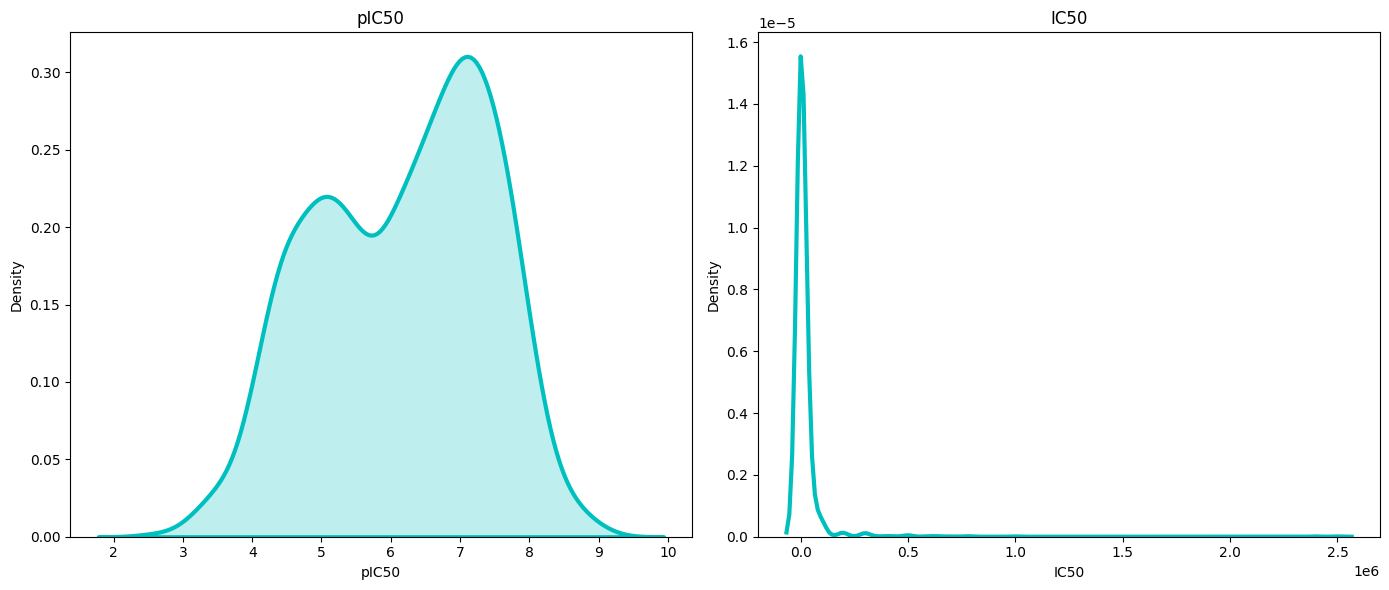

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# KDE plot for pIC50
sns.kdeplot(data=df, x='pIC50', ax=axes[0], color='c', linewidth=3, shade=True)
axes[0].set_title('pIC50')
axes[0].set_xlabel('pIC50')
axes[0].set_ylabel('Density')

# KDE plot for IC50
sns.kdeplot(data=df, x='IC50', ax=axes[1], color='c', linewidth=3)
axes[1].set_title('IC50')
axes[1].set_xlabel('IC50')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()


# Pre-process

## Explanation

### **Data Preparation and Statistical Analysis**


### 1. Standardizing SMILES
Standardizing SMILES ensures all molecules are represented in a consistent format, which is essential for reliable analysis and comparison.

*Example:*  
Original: `OCC`  
Standardized (canonical): `CCO`

### 2. Removing Duplicates
Duplicate molecules (identical SMILES) are removed to avoid bias and redundancy in the dataset.

*Example:*  
If both `CCO` and `OCC` are present, keep only one.

---

### **Physicochemical Descriptor Calculation**

### - Molecular Weight (MW)
The sum of the atomic weights of all atoms in the molecule.

*Example:*  
Ethanol (`CCO`): MW = 46.07 g/mol

### - LogP
The logarithm of the partition coefficient between octanol and water; indicates molecule hydrophobicity.

*Example:*  
Ethanol (`CCO`): LogP ≈ -0.18

### - TPSA (Topological Polar Surface Area)
The surface area of polar atoms (usually oxygen and nitrogen); relates to drug absorption.

*Example:*  
Ethanol (`CCO`): TPSA = 20.23 Å²

### - H-bond Acceptors
Number of atoms (usually O or N) that can accept hydrogen bonds.

*Example:*  
Ethanol (`CCO`): H-bond acceptors = 1

### - H-bond Donors
Number of hydrogen atoms attached to electronegative atoms (like O or N) that can donate hydrogen bonds.

*Example:*  
Ethanol (`CCO`): H-bond donors = 1

### - Rotatable Bonds
Number of single non-ring bonds, excluding terminal bonds, that allow free rotation.

*Example:*  
Ethanol (`CCO`): Rotatable bonds = 1



## implementation

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors, rdMolDescriptors
from IPython.display import display
import datamol as dm



<ipython-input-18-170c672b9f28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Molecule'] = df['Smiles'].apply(dm.to_mol)


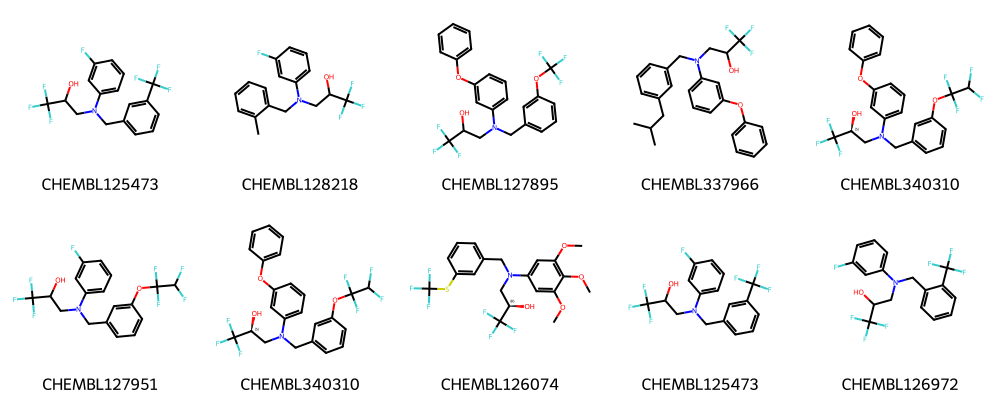

In [ ]:
df['Molecule'] = df['Smiles'].apply(dm.to_mol) #Converts SMILES strings to molecular objects

#Generating an image of the molecules
img = dm.viz.to_image(
    df['Molecule'].tolist(),
    legends=df['Name'].to_list(),
    n_cols=5,
    max_mols = 10,
    mol_size=(200, 200))
from IPython.display import display
display(img)

Processing:   0%|          | 0/1954 [00:00<?, ?it/s]

<ipython-input-19-be0930c86a0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Molecule'] = df['Smiles'].progress_apply(Chem.MolFromSmiles)
/usr/local/lib/python3.11/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:343: UserWarning: Truncating the list of molecules to be displayed to 10. Change the maxMols value to display more.
  warnings.warn(


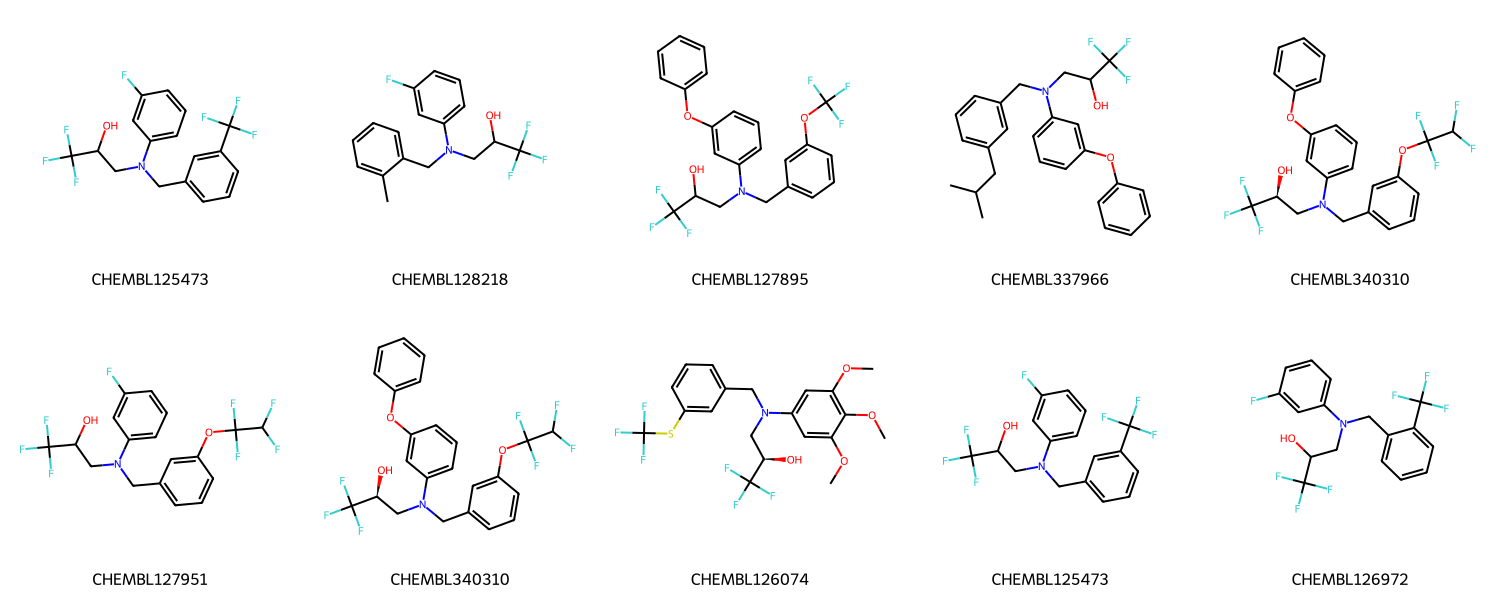

In [ ]:
# Standardizing SMILES
df['Molecule'] = df['Smiles'].progress_apply(Chem.MolFromSmiles)

mols = df['Molecule'].tolist()
img = Draw.MolsToGridImage(mols, molsPerRow=5, maxMols=10, subImgSize=(300,300), legends=df['Name'].tolist())

display(img)

----
* **Standard Smiles**

* **Drop Duplicate**

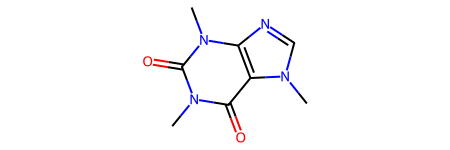

In [ ]:
import rdkit
rdkit.Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')

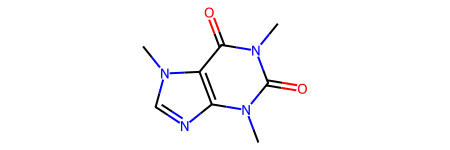

In [ ]:
rdkit.Chem.MolFromSmiles('Cn1c(=O)c2c(ncn2C)n(C)c1=O')

In [ ]:
mol_caf = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')
smile_caf = Chem.MolToSmiles(mol_caf)
smile_caf

'Cn1c(=O)c2c(ncn2C)n(C)c1=O'

In [ ]:
# We can make standard smiles with returining mols to smiles
df['Smiles'] = df['Molecule'].progress_apply(Chem.MolToSmiles)

Processing:   0%|          | 0/1954 [00:00<?, ?it/s]

<ipython-input-23-572185131ef3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Smiles'] = df['Molecule'].progress_apply(Chem.MolToSmiles)


,Smiles,Name,pIC50
1581,C=CC[C@](NC(=O)NC1CCCC1)(c1cc(F)cc(C(F)(F)F)c1)c1ccc(Cl)cn1,CHEMBL2165689,5.148742
1851,C=CC[C@](NC(=O)NC1CCCC1)(c1cc(F)cc(C(F)(F)F)c1)c1ccc(Cl)cn1,CHEMBL2165689,7.070581
1117,CC(=O)O[C@H](CN[C@@](Cc1ccccc1)(c1cc(F)cc(C(F)(F)F)c1)c1ccc(Cl)cn1)C(F)(F)F,CHEMBL3814686,6.083020
1120,CC(=O)O[C@H](CN[C@@](Cc1ccccc1)(c1cc(F)cc(C(F)(F)F)c1)c1ccc(Cl)cn1)C(F)(F)F,CHEMBL3814686,4.000000
1504,CC(=O)c1cc(C)cc2nc(-c3ccc(NC(=O)COc4ccccc4C)cc3)oc12,CHEMBL410916,6.619789
530,CC(=O)c1cc(C)cc2nc(-c3ccc(NC(=O)COc4ccccc4C)cc3)oc12,CHEMBL410916,4.568636
1022,CC(=O)c1ccc2oc(-c3ccc(NC(=O)COc4ccccc4C)cc3)nc2c1,CHEMBL263126,5.920819
1768,CC(=O)c1ccc2oc(-c3ccc(NC(=O)COc4ccccc4C)cc3)nc2c1,CHEMBL263126,4.744727


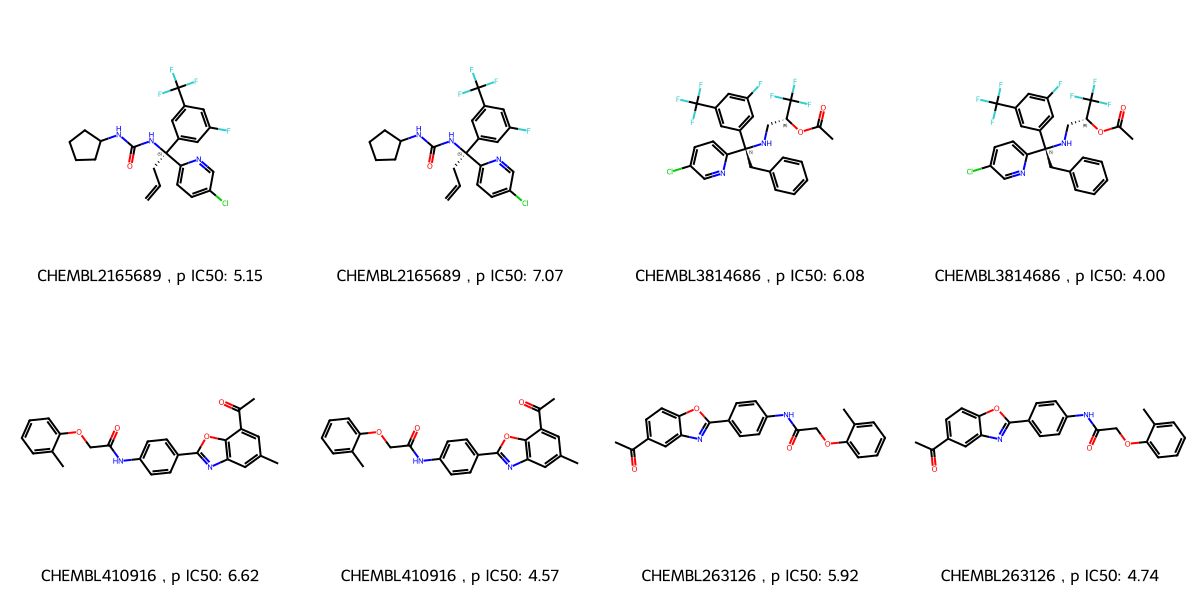

In [ ]:
# You can see duplicae data for same smile with different IC50. We should remove them

dups = df[df.duplicated('Smiles', keep=False)].sort_values('Smiles').copy()

display(dups[['Smiles', 'Name', 'pIC50']].head(8))

dups['mol'] = dups['Smiles'].apply(dm.to_mol)

legends = dups.apply(lambda row: f"{row['Name']} , p IC50: {row['pIC50']:.2f}", axis=1).tolist()

img = dm.viz.to_image(
    dups['mol'].tolist(),
    legends=legends,
    n_cols=4,
    max_mols = 8,
    mol_size=(300, 300)
)
display(img)


In [ ]:
# Removing them can be manual to be sure witch IC50 is more valid.
initial_count = len(df)
after_drop_count = len(df.drop_duplicates(subset=['Smiles']))
lost_count = initial_count - after_drop_count

print(f"The number of data before dropping duplicates: {initial_count}")
print(f"The number of data after dropping duplicates: {after_drop_count}")
print(f"Number of lost entries: {lost_count}")


The number of data before dropping duplicates: 1954
The number of data after dropping duplicates: 1414
Number of lost entries: 540


In [ ]:
df1 = df.drop_duplicates(subset=['Smiles'])

## **Check Distribution for Data**

The pie chart below shows the distribution of the dataset between **active** and **inactive** compounds.  
This visualization helps to quickly assess the balance of classes in the data, which is important for both classification and regression modeling.

- **Active:** 66.7%
- **Inactive:** 33.3%


In [ ]:
def add_active_inactive_columns(df, ic50_col='IC50', threshold_nanomolar=100):

    df['activity'] = df[ic50_col].apply(lambda x: 'active' if x <= threshold_nanomolar else 'inactive')
    return df

In [ ]:
df1 = add_active_inactive_columns(df1)

<ipython-input-27-8e7415f9a688>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['activity'] = df[ic50_col].apply(lambda x: 'active' if x <= threshold_nanomolar else 'inactive')


In [ ]:
value_counts_sorted = df1['activity'].value_counts().sort_values(ascending=False)

value_counts_ratio = df1['activity'].value_counts(normalize=True).sort_values(ascending=False)

print("Counts:")
print(value_counts_sorted)
print("\nRatios:")
print(value_counts_ratio)


Counts:
activity
inactive    944
active      470
Name: count, dtype: int64

Ratios:
activity
inactive    0.66761
active      0.33239
Name: proportion, dtype: float64


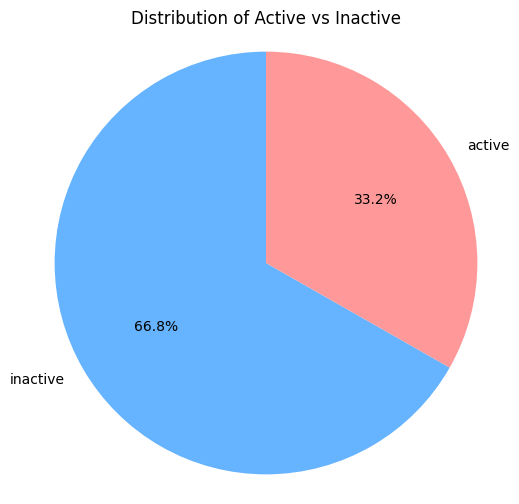

In [ ]:
counts = df1['activity'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Active vs Inactive')
plt.axis('equal')
plt.show()

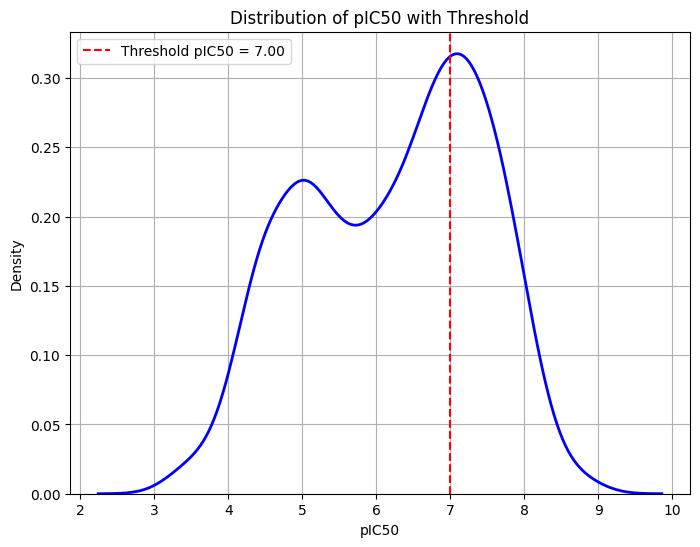

In [ ]:
# We have so much more inactive data. if our model says all is incative it's 67% accurate! So we should fix this.
threshold_nM = 100
threshold_pIC50 = -np.log10(threshold_nM * 1e-9)  # مقدار 7.0

plt.figure(figsize=(8, 6))
sns.kdeplot(df1['pIC50'], color='blue', linewidth=2)
plt.axvline(x=threshold_pIC50, color='red', linestyle='--', label=f'Threshold pIC50 = {threshold_pIC50:.2f}')
plt.title('Distribution of pIC50 with Threshold')
plt.xlabel('pIC50')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

It has good destribution. So we can use regression. unless, we use classification to report wether a compund has good activity or not.

## **Physicochemical Descriptor Calculation**

In this section, key physicochemical descriptors are calculated for each molecule using RDKit. These features are essential for molecular analysis and QSAR modeling.

**Calculated descriptors:**
- **Molecular Weight (MW):** The total mass of the molecule.
- **LogP:** The logarithm of the partition coefficient between octanol and water (hydrophobicity).
- **Topological Polar Surface Area (TPSA):** The surface area contributed by polar atoms, related to drug absorption.
- **H-bond Acceptors:** Number of atoms (usually O or N) that can accept hydrogen bonds.
- **H-bond Donors:** Number of hydrogens attached to electronegative atoms (like O or N) that can donate hydrogen bonds.
- **Rotatable Bonds:** Number of single, non-ring bonds that allow free rotation (molecular flexibility).


In [ ]:
df1.loc[:, 'MW'] = df1['Molecule'].apply(Descriptors.MolWt)
df1.loc[:, 'LogP'] = df1['Molecule'].apply(Descriptors.MolLogP)
df1.loc[:, 'TPSA'] = df1['Molecule'].apply(rdMolDescriptors.CalcTPSA)
df1.loc[:, 'H_acceptors'] = df1['Molecule'].apply(rdMolDescriptors.CalcNumHBA)
df1.loc[:, 'H_donors'] = df1['Molecule'].apply(rdMolDescriptors.CalcNumHBD)
df1.loc[:, 'RotatableBonds'] = df1['Molecule'].apply(rdMolDescriptors.CalcNumRotatableBonds)


<ipython-input-32-f329ff3c202b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'MW'] = df1['Molecule'].apply(Descriptors.MolWt)
<ipython-input-32-f329ff3c202b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'LogP'] = df1['Molecule'].apply(Descriptors.MolLogP)
<ipython-input-32-f329ff3c202b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [ ]:
# There are some general rules. for example oral drugs should have less MW than 500. But It's ok to use them here for this disease.
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
IC50,1414.0,13324.754477,48577.483579,1.000000,59.000000,400.00000,6983.750000,790000.0000
pIC50,1414.0,6.222645,1.224233,3.102373,5.155915,6.39794,7.229148,9.0000
MW,1414.0,559.493738,114.140866,129.081000,477.388750,559.50000,650.197750,869.1190
LogP,1414.0,7.103644,1.688877,-0.131700,5.918375,6.93480,8.208700,11.9763
TPSA,1414.0,68.172079,26.697363,21.700000,45.590000,64.36000,88.150000,173.4700
H_acceptors,1414.0,4.908062,1.894987,1.000000,4.000000,4.00000,6.000000,12.0000
H_donors,1414.0,0.975955,0.683017,0.000000,1.000000,1.00000,1.000000,6.0000
RotatableBonds,1414.0,6.880481,2.555928,0.000000,6.000000,7.00000,8.000000,30.0000


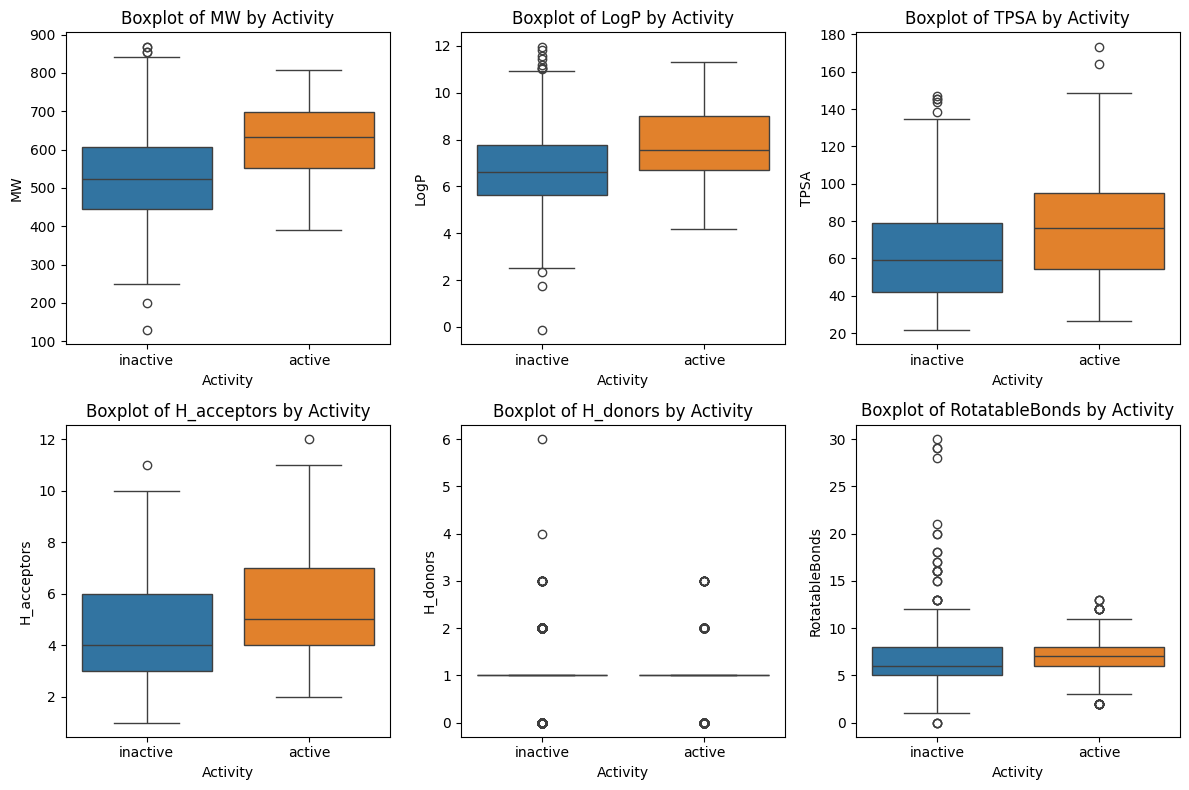

In [ ]:
# Let's check these parameters to evaluate their relevance to our labels.
features = ['MW', 'LogP', 'TPSA', 'H_acceptors', 'H_donors', 'RotatableBonds']
plt.figure(figsize=(12, 8), dpi=100)

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='activity', y=feature, data=df1, hue='activity')
    plt.title(f'Boxplot of {feature} by Activity')
    plt.xlabel('Activity')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


In [ ]:
# removes outliers with rule related to Qs !
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

physchem_features = ['MW', 'LogP', 'TPSA', 'H_acceptors', 'H_donors', 'RotatableBonds']

df_no_outliers = remove_outliers_iqr(df1, physchem_features)

print(f"Original shape: {df1.shape}")
print(f"Shape after outlier removal: {df_no_outliers.shape}")


Original shape: (1414, 13)
Shape after outlier removal: (852, 13)


⚠️ Important Notes:
1.5×IQR is a common rule, but you can adjust it:  

Stricter: Use 3*IQR to remove only extreme outliers.

Looser: Use 1*IQR to remove more data.

Check if outliers are meaningful before removing them (sometimes they’re important discoveries!).

🔄 Alternative Methods:
Z-score: Remove data points beyond ±3 standard deviations.

Visual Inspection: Use boxplots (sns.boxplot(data=df1[physchem_features])) to spot outliers.

In [ ]:
df1.head()

,Name,Smiles,type,IC50,pIC50,Molecule,activity,MW,LogP,TPSA,H_acceptors,H_donors,RotatableBonds
0,CHEMBL125473,OC(CN(Cc1cccc(C(F)(F)F)c1)c1cccc(F)c1)C(F)(F)F,IC50,37000.0,4.431798,<rdkit.Chem.rdchem.Mol object at 0x7be0130ba6c0>,inactive,381.291,4.77430,23.47,2,1,5
1,CHEMBL128218,Cc1ccccc1CN(CC(O)C(F)(F)F)c1cccc(F)c1,IC50,100000.0,4.000000,<rdkit.Chem.rdchem.Mol object at 0x7be0130bbf40>,inactive,327.321,4.06392,23.47,2,1,5
2,CHEMBL127895,OC(CN(Cc1cccc(OC(F)(F)F)c1)c1cccc(Oc2ccccc2)c1)C(F)(F)F,IC50,40000.0,4.397940,<rdkit.Chem.rdchem.Mol object at 0x7be012a28040>,inactive,471.397,6.30730,41.93,4,1,8
3,CHEMBL337966,CC(C)Cc1cccc(CN(CC(O)C(F)(F)F)c2cccc(Oc3ccccc3)c2)c1,IC50,540.0,6.267606,<rdkit.Chem.rdchem.Mol object at 0x7be012a280b0>,inactive,443.509,6.60720,32.70,3,1,9
4,CHEMBL340310,O[C@@H](CN(Cc1cccc(OC(F)(F)C(F)F)c1)c1cccc(Oc2ccccc2)c1)C(F)(F)F,IC50,800.0,6.096910,<rdkit.Chem.rdchem.Mol object at 0x7be012a28120>,inactive,503.414,6.64540,41.93,4,1,10


In [ ]:
#df1.sort_values()


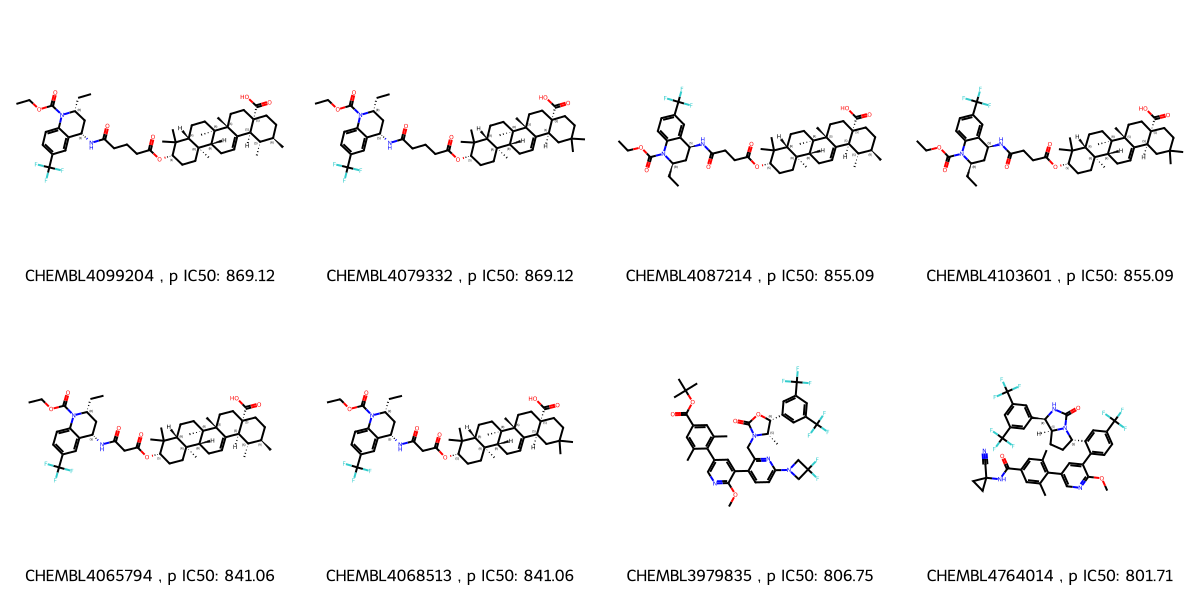

In [ ]:
legends = df1.sort_values('MW', ascending=False).apply(lambda row: f"{row['Name']} , p IC50: {row['MW']:.2f}", axis=1).tolist()

img = dm.viz.to_image(
     df1.sort_values('MW', ascending=False)['Molecule'].tolist(),
    legends=legends,
    n_cols=4,
    max_mols = 8,
    mol_size=(300, 300)
)
display(img)

## PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

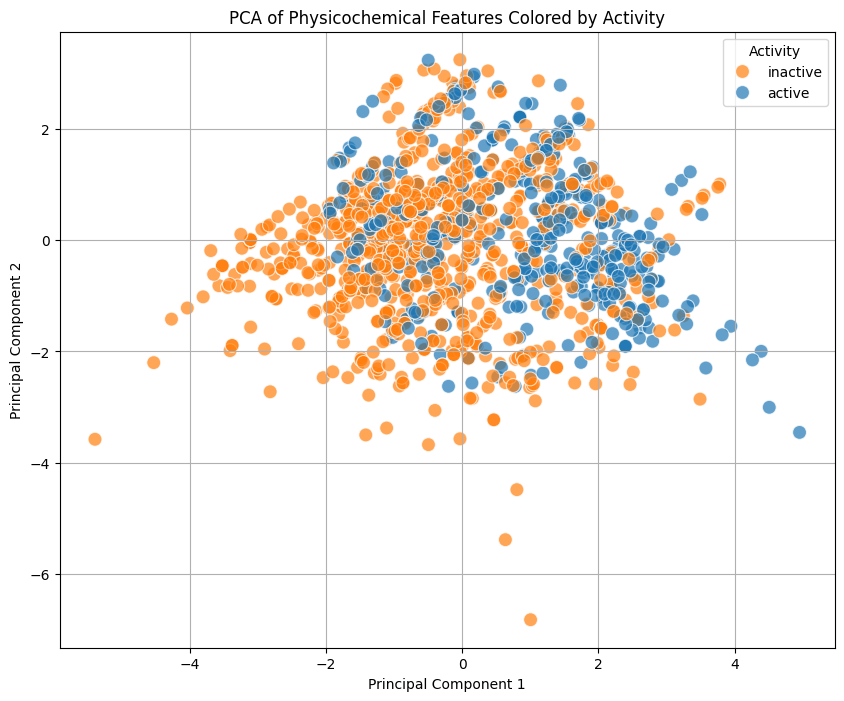

In [ ]:
# PCA is not used to train models. Because it will lose about 30% of data
# We used it here to show how similar are physicochemical  features of out smiles.
# This indicates that these features are not enough!

features = ['MW', 'LogP', 'TPSA', 'H_acceptors', 'H_donors', 'RotatableBonds']

X = df1[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['activity'] = df1['activity'].values

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='activity',
    palette={'active': '#1f77b4', 'inactive': '#ff7f0e'},
    s=100,
    alpha=0.7
)
plt.title('PCA of Physicochemical Features Colored by Activity')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Activity')
plt.grid(True)
plt.show()


In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)


[0.37995288 0.26939994]


## **Calculate descriptors**

In [ ]:
from skfp.fingerprints import MordredFingerprint, PubChemFingerprint, RDKitFingerprint, ECFPFingerprint, MACCSFingerprint, RDKit2DDescriptorsFingerprint, MAPFingerprint


In [ ]:
def calculate_fingerprint(mols):
    fingerprint_dic = {
        'mordered': MordredFingerprint(), 'PubChem': PubChemFingerprint(),
        'ECFP': ECFPFingerprint(radius=2), 'rdkit-finger' : RDKitFingerprint(),
        'rdkit-dec':RDKit2DDescriptorsFingerprint(), 'Macss':MACCSFingerprint(),
        'Map4': MAPFingerprint(fp_size=2048),
    }

    all_data = {}
    for finger in fingerprint_dic:
        func = fingerprint_dic[finger]
        finger_desc = func.transform(mols)
        feature_name = func.get_feature_names_out()
        finger_df = pd.DataFrame(finger_desc, columns=feature_name)
        all_data[f'{finger}'] = finger_df

    return all_data


# It's a shorter version. We can add more but it would take more time.
def calculate_fingerprint2(mols):
    fingerprint_dic = {
        'rdkit-dec':RDKit2DDescriptorsFingerprint()
    }

    all_data = {}
    for finger in fingerprint_dic:
        func = fingerprint_dic[finger]
        finger_desc = func.transform(mols)
        feature_name = func.get_feature_names_out()
        finger_df = pd.DataFrame(finger_desc, columns=feature_name)
        all_data[f'{finger}'] = finger_df

    return all_data

def calculate_fingerprint3(mols):
    fingerprint_dic = {
        'mordered': MordredFingerprint(),
        'ECFP': ECFPFingerprint(radius=2), 'rdkit-finger' : RDKitFingerprint(),
        'rdkit-dec':RDKit2DDescriptorsFingerprint(),
    }

    all_data = {}
    for finger in fingerprint_dic:
        func = fingerprint_dic[finger]
        finger_desc = func.transform(mols)
        feature_name = func.get_feature_names_out()
        finger_df = pd.DataFrame(finger_desc, columns=feature_name)
        all_data[f'{finger}'] = finger_df

    return all_data

In [ ]:
df_main = df1[['Name', 'Smiles', 'pIC50', 'activity']]
df_main

,Name,Smiles,pIC50,activity
0,CHEMBL125473,OC(CN(Cc1cccc(C(F)(F)F)c1)c1cccc(F)c1)C(F)(F)F,4.431798,inactive
1,CHEMBL128218,Cc1ccccc1CN(CC(O)C(F)(F)F)c1cccc(F)c1,4.000000,inactive
2,CHEMBL127895,OC(CN(Cc1cccc(OC(F)(F)F)c1)c1cccc(Oc2ccccc2)c1)C(F)(F)F,4.397940,inactive
3,CHEMBL337966,CC(C)Cc1cccc(CN(CC(O)C(F)(F)F)c2cccc(Oc3ccccc3)c2)c1,6.267606,inactive
4,CHEMBL340310,O[C@@H](CN(Cc1cccc(OC(F)(F)C(F)F)c1)c1cccc(Oc2ccccc2)c1)C(F)(F)F,6.096910,inactive
...,...,...,...,...
1935,CHEMBL4099285,CC[C@@H]1C[C@H](N(Cc2cc(OC)cc(C(F)(F)F)c2)c2ncc(Br)cn2)C[C@H](Cc2ccccc2)N1C(=O)OC(C)(C)C,5.000000,inactive
1947,CHEMBL4846106,COc1ccc(-c2ccc(C(=O)O)cc2C)cc1-c1cnc(N2CCC2)nc1CN1C(=O)O[C@H](c2cc(C(F)(F)F)cc(C(F)(F)F)c2)[C@@H]1C,7.337242,active
1949,CHEMBL4862151,COc1cc(F)c(C(C)C)cc1-c1ccc(C(F)(F)F)cc1[C@@H]1CC[C@H]2[C@@H](c3cc(C(F)(F)F)cc(C(F)(F)F)c3)SC(=O)N12,6.769551,inactive
1951,CHEMBL4849688,COc1ccc(-c2ccccc2C(=O)O)cc1-c1ccc(C(F)(F)F)cc1CN1C(=O)O[C@H](c2cc(C(F)(F)F)cc(C(F)(F)F)c2)[C@@H]1C,5.514279,inactive


In [ ]:
# In order to get fingerprints, we need to convert smiles to mols.
mols = df_main['Smiles'].progress_apply(Chem.MolFromSmiles)
fingerprint_dic = calculate_fingerprint3(mols)

Processing:   0%|          | 0/1414 [00:00<?, ?it/s]

In [ ]:
rdkit_dec = fingerprint_dic['rdkit-dec']
rdkit_dec

,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,2.324604,742.376648,19.535170,13.150544,13.150544,11.964364,7.380348,7.380348,5.615941,5.615941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.754320
1,2.295861,657.036804,17.035170,12.516651,12.516651,10.769876,7.069385,7.069385,5.344289,5.344289,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.837194
2,1.873716,1040.111816,24.062267,16.975828,16.975828,15.493133,9.668546,9.668546,7.045611,7.045611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.391380
3,1.867030,989.617065,23.139618,18.218143,18.218143,15.202529,10.609853,10.609853,8.268325,8.268325,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.404058
4,1.872584,1093.730835,25.639618,17.931143,17.931143,16.436508,10.204675,10.204675,7.462368,7.462368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.314989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,1.753342,1367.011108,31.363232,25.066545,26.652540,20.267521,14.316112,15.109110,11.815164,12.730839,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.243061
1410,1.404096,1946.133179,36.120228,26.893478,26.893478,23.544083,15.450768,15.450768,12.132967,12.132967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.183802
1411,1.635178,1598.004639,33.222885,23.794020,24.610518,20.805918,13.681491,14.561144,11.239833,12.332644,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.254182
1412,1.605640,1885.437134,36.051311,25.296461,25.296461,22.789082,14.271309,14.271309,11.147563,11.147563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.194759


In [ ]:
mordered_dec = fingerprint_dic['mordered']
mordered_dec

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,20.100515,17.095505,0.0,0.0,30.662819,2.378756,4.757512,30.662819,1.179339,4.165424,...,10.123225,60.894245,381.096375,9.527409,1667.0,38.0,134.0,151.0,11.291667,5.444445
1,17.632998,15.262411,0.0,0.0,27.977390,2.363379,4.726758,27.977390,1.216408,4.041848,...,9.922750,57.070557,327.124634,8.178116,1174.0,33.0,116.0,131.0,9.229167,4.972222
2,25.709589,20.060732,0.0,0.0,40.078175,2.374571,4.749142,40.078175,1.214490,4.407843,...,10.276464,68.919090,471.126923,9.060133,3348.0,46.0,170.0,190.0,12.152778,6.986111
3,24.744507,19.313501,0.0,0.0,39.517799,2.371804,4.743608,39.517799,1.234931,4.374328,...,10.195374,67.612000,443.207214,7.386787,3082.0,45.0,162.0,182.0,11.201389,6.944445
4,27.122055,21.305075,0.0,0.0,42.662033,2.379662,4.759323,42.662033,1.218915,4.464696,...,10.373648,71.282204,503.133148,9.147875,3948.0,52.0,180.0,204.0,13.263889,7.486111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,33.435394,26.302023,0.0,0.0,53.137627,2.473235,4.946470,53.137627,1.235759,4.677863,...,10.692695,80.569550,662.207947,8.175406,6134.0,69.0,226.0,261.0,16.208334,9.263889
1410,39.823273,30.222357,1.0,0.0,62.011387,2.511254,4.985306,62.011387,1.240228,4.855091,...,11.040535,103.162750,700.212036,8.752650,9731.0,89.0,278.0,334.0,18.625000,10.472222
1411,35.886391,28.697859,0.0,0.0,54.860111,2.579179,5.067056,54.860111,1.219114,4.748312,...,10.995226,99.664871,665.144653,9.502067,6879.0,83.0,254.0,307.0,18.965279,9.222222
1412,38.755257,30.137028,1.0,0.0,60.485699,2.511771,4.986861,60.485699,1.234402,4.823557,...,10.998041,101.946991,697.151062,9.550014,8999.0,88.0,270.0,322.0,19.965279,10.194445


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (accuracy_score, confusion_matrix,
                           classification_report, roc_auc_score)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from rdkit.Chem import AllChem
from rdkit import Chem, DataStructs
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = df_main.copy()

# Preprocessing
# ======================================================

# Convert labels to binary (0=inactive, 1=active)
le = LabelEncoder()
df['activity'] = le.fit_transform(df['activity'])  # active=1, inactive=0

# Check class balance
print("Class distribution:")
print(df['activity'].value_counts(normalize=True))

# Generate ECFP fingerprints (typically best performer)
def smiles_to_ecfp(smiles, radius=2, n_bits=2048):
    """Convert SMILES to ECFP fingerprint"""
    mol = Chem.MolFromSmiles(smiles)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

print("Generating ECFP fingerprints...")
X = np.array([smiles_to_ecfp(s) for s in df['Smiles']])  # Replace 'SMILES' with your column name
y = df['activity'].values

Class distribution:
activity
1    0.66761
0    0.33239
Name: proportion, dtype: float64
Generating ECFP fingerprints...


[09:51:52] DEPRECATION WARNING: please use MorganGenerator
[09:51:52] DEPRECATION WARNING: please use MorganGenerator
[09:51:52] DEPRECATION WARNING: please use MorganGenerator
[09:51:52] DEPRECATION WARNING: please use MorganGenerator
[09:51:52] DEPRECATION WARNING: please use MorganGenerator
[09:51:52] DEPRECATION WARNING: please use MorganGenerator
[09:51:52] DEPRECATION WARNING: please use MorganGenerator
[09:51:52] DEPRECATION WARNING: please use MorganGenerator
[09:51:52] DEPRECATION WARNING: please use MorganGenerator
[09:51:52] DEPRECATION WARNING: please use MorganGenerator
[09:51:52] DEPRECATION WARNING: please use MorganGenerator
[09:51:52] DEPRECATION WARNING: please use MorganGenerator
[09:51:52] DEPRECATION WARNING: please use MorganGenerator
[09:51:52] DEPRECATION WARNING: please use MorganGenerator
[09:51:52] DEPRECATION WARNING: please use MorganGenerator
[09:51:52] DEPRECATION WARNING: please use MorganGenerator
[09:51:52] DEPRECATION WARNING: please use MorganGenerat

In [ ]:
# Feature Selection
# ======================================================

# Initial filter - remove low variance features
selector = VarianceThreshold(threshold=0.05)  # Keeps features with >5% variance
X_filtered = selector.fit_transform(X)

print(f"Original features: {X.shape[1]}, After variance threshold: {X_filtered.shape[1]}")


Original features: 2048, After variance threshold: 268


In [ ]:
# Train/Test Split (Stratified)
# ======================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Machine Learning Models


Cross-validation ROC-AUC: 0.871 ± 0.018

Test Set Performance:
Accuracy: 0.841
ROC-AUC: 0.905

Classification Report:
              precision    recall  f1-score   support

    inactive       0.74      0.81      0.77        94
      active       0.90      0.86      0.88       189

    accuracy                           0.84       283
   macro avg       0.82      0.83      0.82       283
weighted avg       0.85      0.84      0.84       283



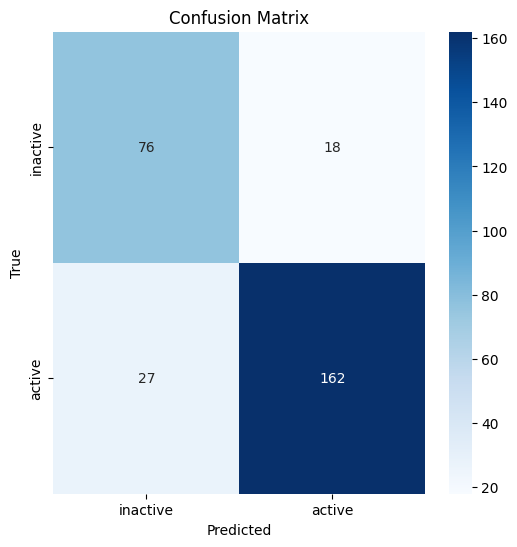

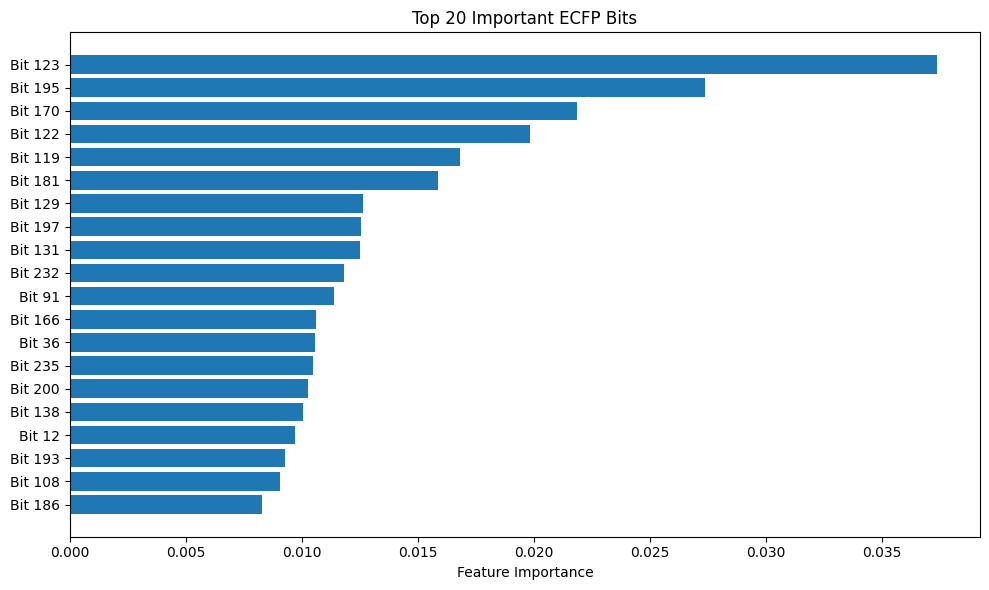

In [ ]:
# Optimized Random Forest (pre-tuned for classification)
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',  # Handles class imbalance
    n_jobs=-1,
    random_state=42
)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')

print(f"\nCross-validation ROC-AUC: {np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}")

# Train final model
model.fit(X_train, y_train)

# Evaluation
# ======================================================

# Test set predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for active class

print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['inactive', 'active']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['inactive', 'active'],
            yticklabels=['inactive', 'active'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
# ======================================================

# Get top 20 important features
importances = model.feature_importances_
top_idx = np.argsort(importances)[-20:][::-1]
top_importance = importances[top_idx]

plt.figure(figsize=(10,6))
plt.barh(range(20), top_importance[::-1], align='center')
plt.yticks(range(20), [f"Bit {i}" for i in top_idx[::-1]])
plt.xlabel('Feature Importance')
plt.title('Top 20 Important ECFP Bits')
plt.tight_layout()
plt.show()

In [ ]:
'''
import joblib

# Save the best model
joblib.dump(model, "Random_Forest.pkl")
print("Model saved as Random_Forest.pkl")
'''

'\nimport joblib\n\n# Save the best model\njoblib.dump(model, "Random_Forest.pkl")\nprint("Model saved as Random_Forest.pkl")\n'

In [ ]:
'''
# Load and reevaluate
import joblib
model = joblib.load("Random_Forest.pkl")
'''

'\n# Load and reevaluate\nimport joblib\nmodel = joblib.load("Random_Forest.pkl")\n'


Test Set Performance:
Accuracy: 0.841
ROC-AUC: 0.905

Classification Report:
              precision    recall  f1-score   support

    inactive       0.74      0.81      0.77        94
      active       0.90      0.86      0.88       189

    accuracy                           0.84       283
   macro avg       0.82      0.83      0.82       283
weighted avg       0.85      0.84      0.84       283



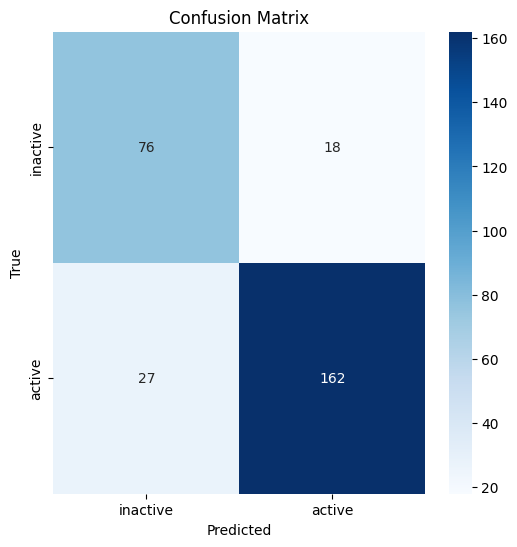

In [ ]:
# Test set predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for active class

print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['inactive', 'active']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['inactive', 'active'],
            yticklabels=['inactive', 'active'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
''' RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Optimized parameter space
param_dist = {
    'n_estimators': np.arange(100, 600, 50),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.8]  # Add feature sampling
}

# Faster than GridSearchCV
search = RandomizedSearchCV(
    RandomForestClassifier(class_weight='balanced'),
    param_dist,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)
search.fit(X_train, y_train)

print(f"Best ROC-AUC: {search.best_score_:.3f}")
'''

' RandomizedSearchCV\n\nfrom sklearn.model_selection import RandomizedSearchCV\nimport numpy as np\n\n# Optimized parameter space\nparam_dist = {\n    \'n_estimators\': np.arange(100, 600, 50),\n    \'max_depth\': [None, 10, 20, 30],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'max_features\': [\'sqrt\', \'log2\', 0.8]  # Add feature sampling\n}\n\n# Faster than GridSearchCV\nsearch = RandomizedSearchCV(\n    RandomForestClassifier(class_weight=\'balanced\'),\n    param_dist,\n    n_iter=50,\n    cv=5,\n    scoring=\'roc_auc\',\n    n_jobs=-1,\n    random_state=42\n)\nsearch.fit(X_train, y_train)\n\nprint(f"Best ROC-AUC: {search.best_score_:.3f}")\n'

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Minimal but impactful parameters
param_grid = {
    'n_estimators': [100, 200, 300],  # Tree count
    'max_depth': [10, 20, None],  # Tree depth (None=unlimited)
    'min_samples_split': [2, 5],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]  # Handle imbalance
}

# Keep other settings from your best model
base_model = RandomForestClassifier(
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

# Faster grid search with 3-fold CV
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=3,  # Fewer folds = faster
    scoring='roc_auc',
    verbose=1
)

grid_search.fit(X_train, y_train)

# Show best parameters
print("🔥 Best Parameters Found:")
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")
print(f"Best Validation AUC: {grid_search.best_score_:.3f}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
🔥 Best Parameters Found:
class_weight: None
max_depth: None
min_samples_leaf: 4
min_samples_split: 2
n_estimators: 100
Best Validation AUC: 0.867


## Testing a new model with new features (RDKit)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generate ECFP (existing code)
X_ecfp = np.array([smiles_to_ecfp(s) for s in df['Smiles']])

# Generate RDKit 2D features
def get_rdkit_2d(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return [
        Descriptors.MolWt(mol),
        Descriptors.MolLogP(mol),
        Descriptors.TPSA(mol),
        Descriptors.NumHDonors(mol),
        Descriptors.NumHAcceptors(mol)
    ]

X_rdkit = np.array([get_rdkit_2d(s) for s in df['Smiles']])

# 1. Scale RDKit features (important for PCA)
scaler = StandardScaler()
X_rdkit_scaled = scaler.fit_transform(X_rdkit)

# 2. Apply PCA to ECFP (retain 95% variance)
pca_ecfp = PCA(n_components=0.95)
X_ecfp_pca = pca_ecfp.fit_transform(X_ecfp)

print(f"Original ECFP: {X_ecfp.shape[1]} features")
print(f"After PCA: {X_ecfp_pca.shape[1]} features")

# 3. Fuse features
X_fused = np.hstack([X_ecfp_pca, X_rdkit_scaled])
print(f"Fused feature shape: {X_fused.shape}")

[09:55:03] DEPRECATION WARNING: please use MorganGenerator
[09:55:03] DEPRECATION WARNING: please use MorganGenerator
[09:55:03] DEPRECATION WARNING: please use MorganGenerator
[09:55:03] DEPRECATION WARNING: please use MorganGenerator
[09:55:03] DEPRECATION WARNING: please use MorganGenerator
[09:55:03] DEPRECATION WARNING: please use MorganGenerator
[09:55:03] DEPRECATION WARNING: please use MorganGenerator
[09:55:03] DEPRECATION WARNING: please use MorganGenerator
[09:55:03] DEPRECATION WARNING: please use MorganGenerator
[09:55:03] DEPRECATION WARNING: please use MorganGenerator
[09:55:03] DEPRECATION WARNING: please use MorganGenerator
[09:55:03] DEPRECATION WARNING: please use MorganGenerator
[09:55:03] DEPRECATION WARNING: please use MorganGenerator
[09:55:03] DEPRECATION WARNING: please use MorganGenerator
[09:55:03] DEPRECATION WARNING: please use MorganGenerator
[09:55:03] DEPRECATION WARNING: please use MorganGenerator
[09:55:03] DEPRECATION WARNING: please use MorganGenerat

Original ECFP: 2048 features
After PCA: 277 features
Fused feature shape: (1414, 282)


In [ ]:
from sklearn.metrics import roc_auc_score

# Split fused features
X_train_fused, X_test_fused, y_train, y_test = train_test_split(
    X_fused, y, test_size=0.2, random_state=42, stratify=y
)


# New model (Fused features)
model_fused = RandomForestClassifier(n_estimators=100, min_samples_leaf=4, min_samples_split=2, random_state=42)
model_fused.fit(X_train_fused, y_train)
y_pred_fused = model_fused.predict_proba(X_test_fused)[:, 1]

# Compare performance
print("\n🔍 Model Comparison:")
print(f"Original ECFP AUC: {roc_auc_score(y_test, y_pred):.4f}")
print(f"Fused Features AUC: {roc_auc_score(y_test, y_pred_fused):.4f}")


🔍 Model Comparison:
Original ECFP AUC: 0.8328
Fused Features AUC: 0.8990


# 🧩 Clustering-Based Splitting Implementation

In [ ]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances

# 1. Reduce similarity space with PCA (using your existing X_fused)
similarity_pca = PCA(n_components=50).fit_transform(X_fused)

# 2. Cluster molecules into groups
n_clusters = 5  # Start with 5 clusters (adjust based on dataset size)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(similarity_pca)

# 3. Create train/test split where each cluster is represented
from sklearn.model_selection import train_test_split

# Split while preserving cluster distribution
train_idx, test_idx = [], []
for cluster in range(n_clusters):
    cluster_indices = np.where(cluster_labels == cluster)[0]
    c_train, c_test = train_test_split(cluster_indices, test_size=0.2, random_state=42)
    train_idx.extend(c_train)
    test_idx.extend(c_test)

# 4. Create masks
train_mask = np.zeros(len(X_fused), dtype=bool)
train_mask[train_idx] = True

# 5. Prepare data
X_train_cluster = X_fused[train_mask]
X_test_cluster = X_fused[~train_mask]
y_train_cluster = y[train_mask]
y_test_cluster = y[~train_mask]

# Verify cluster distribution
print("Cluster distribution in splits:")
print(pd.DataFrame({
    'Train': pd.Series(cluster_labels[train_mask]).value_counts(normalize=True),
    'Test': pd.Series(cluster_labels[~train_mask]).value_counts(normalize=True)
}))

Cluster distribution in splits:
      Train      Test
0  0.332743  0.330986
1  0.184071  0.186620
2  0.201770  0.200704
3  0.080531  0.080986
4  0.200885  0.200704


In [ ]:
# Check for data leakage!
# If overlap is not empty, your train and test sets share some clusters.

# Get the cluster labels for training and test indices
train_clusters = set(cluster_labels[train_idx])  # unique clusters in training data
test_clusters = set(cluster_labels[test_idx])    # unique clusters in test data

# Find any overlap between training and test clusters
overlap = train_clusters & test_clusters         # set intersection: shared clusters

# Print the results
print("Clusters in both train and test:", overlap)


Clusters in both train and test: {np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4)}


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# 1. Split original data into train/test sets FIRST (prevents test leakage)
X_train_raw, X_test_raw, y_train_cluster, y_test_cluster = train_test_split(
    X_fused, y, test_size=0.2, random_state=42
)

# 2. Apply PCA to reduce dimensionality (fit only on training data)
pca = PCA(n_components=50)
similarity_pca_train = pca.fit_transform(X_train_raw)  # fit and transform on train
similarity_pca_test = pca.transform(X_test_raw)        # transform test using train PCA

# 3. Cluster only the training set
n_clusters = 5  # You can adjust based on dataset size
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels_train = kmeans.fit_predict(similarity_pca_train)

# Optional: get cluster labels for the test set (not used in split, just for analysis)
cluster_labels_test = kmeans.predict(similarity_pca_test)

# 4. Save outputs using your original variable names
X_train_cluster = X_train_raw           # train features
X_test_cluster = X_test_raw             # test features
# y_train_cluster, y_test_cluster already defined above

# 5. Optional: Print cluster distribution in both sets
print("Cluster distribution in splits:")
print(pd.DataFrame({
    'Train': pd.Series(cluster_labels_train).value_counts(normalize=True),
    'Test': pd.Series(cluster_labels_test).value_counts(normalize=True)
}))


Cluster distribution in splits:
      Train      Test
0  0.489832  0.551237
1  0.161804  0.159011
2  0.076039  0.098940
3  0.076039  0.042403
4  0.196286  0.148410


In [ ]:
# Check if any clusters in the test set are not seen in training
train_clusters = set(cluster_labels_train)
test_clusters = set(cluster_labels_test)
new_clusters = test_clusters - train_clusters

print("Clusters only in test set (not seen in training):", new_clusters)


Clusters only in test set (not seen in training): set()



Model Performance Comparison:
                  Accuracy   ROC-AUC  Balanced Accuracy        F1       MCC  \
Stratified Split  0.901060  0.898992           0.856411  0.930348  0.778103   
Cluster Split     0.886926  0.965343           0.825187  0.923077  0.741029   

                  Precision    Recall  
Stratified Split   0.877934  0.989418  
Cluster Split      0.860987  0.994819  


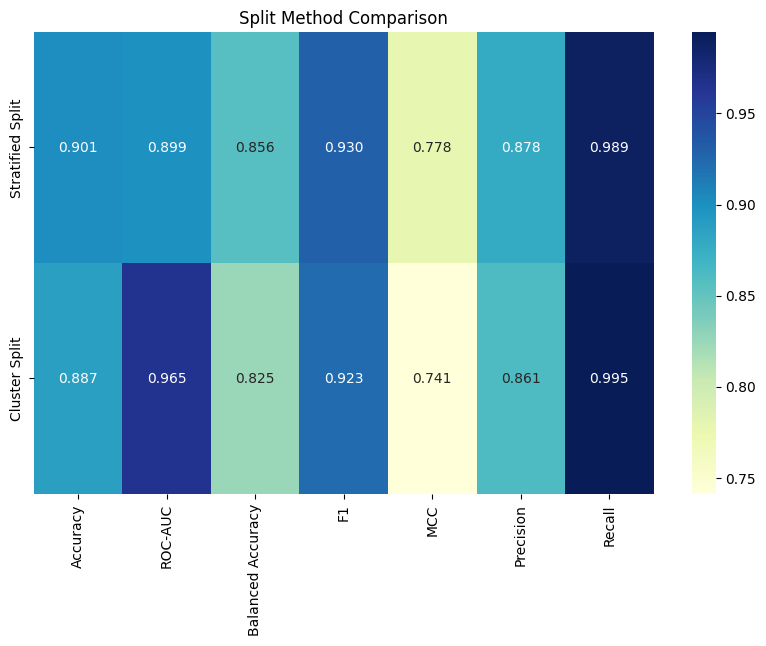

In [ ]:
# Evaluation metrics
# y_true: actual labels (0 or 1)
# y_pred: predicted labels (0 or 1)
# y_proba: predicted probabilities (0 to 1)
def get_metrics(y_true, y_pred, y_proba):
    from sklearn.metrics import accuracy_score, roc_auc_score, balanced_accuracy_score, f1_score, matthews_corrcoef, precision_score, recall_score # Added imports
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'ROC-AUC': roc_auc_score(y_true, y_proba),
        'Balanced Accuracy': balanced_accuracy_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred),
        'MCC': matthews_corrcoef(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred), # Added Precision
        'Recall': recall_score(y_true, y_pred)       # Added Recall
    }

# You need to calculate the predicted labels (0 or 1) for the stratified split
# model_fused was trained on the stratified split
stratified_preds = model_fused.predict(X_test_fused) # This is the correct variable name from previous cell

# Recalculate the predicted labels for the cluster split test set as well
cluster_preds = model_fused.predict(X_test_cluster)

# Assuming cluster_proba is calculated similarly to y_pred_fused
# If not, you'll need to add:
cluster_proba = model_fused.predict_proba(X_test_cluster)[:, 1]


results = {
    # Use y_test, stratified_preds, and stratified_proba for the stratified split results
    'Stratified Split': get_metrics(y_test, stratified_preds, y_pred_fused), # Note: y_pred_fused is the probability for stratified split
    # Use y_test_cluster, cluster_preds, and cluster_proba for the cluster split results
    'Cluster Split': get_metrics(y_test_cluster, cluster_preds, cluster_proba)
}

# Display comparison
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)

# Visual comparison
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(results_df, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Split Method Comparison")
plt.show()

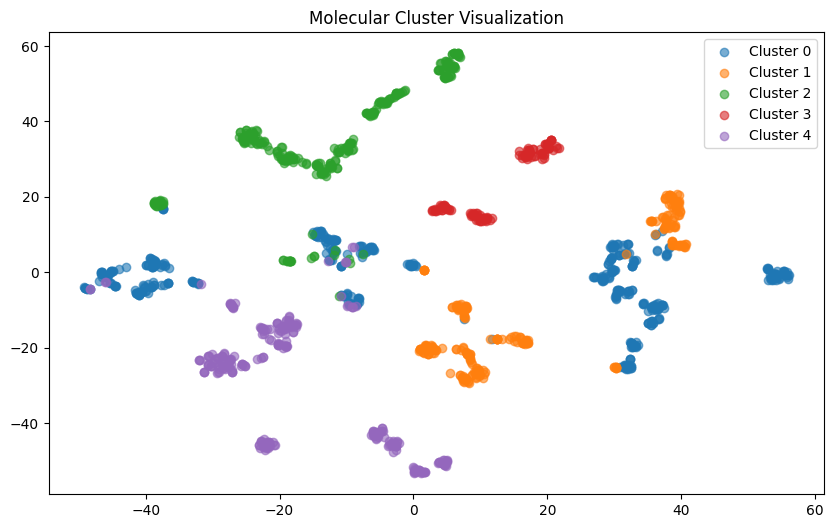


Scaffold diversity per cluster:
0    376
1    208
2    228
3     91
4    227
Name: scaffold, dtype: int64


In [ ]:
# 1. Visualize cluster separation
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
cluster_vis = tsne.fit_transform(similarity_pca)

plt.figure(figsize=(10, 6))
for c in range(n_clusters):
    mask = cluster_labels == c
    plt.scatter(cluster_vis[mask, 0], cluster_vis[mask, 1],
                label=f'Cluster {c}', alpha=0.6)
plt.title("Molecular Cluster Visualization")
plt.legend()
plt.show()

# 2. Check scaffold distribution in clusters
from rdkit.Chem import AllChem

def get_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return AllChem.MurckoDecompose(mol)

df['scaffold'] = df['Smiles'].apply(get_scaffold)
print("\nScaffold diversity per cluster:")
print(df.iloc[train_idx].groupby(cluster_labels[train_mask])['scaffold'].nunique())

## Murcko scaffolds

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from collections import defaultdict
import numpy as np
from sklearn.model_selection import train_test_split

# 1. Generate Murcko scaffolds for all molecules
def get_murcko_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    try:
        scaffold = AllChem.MurckoDecompose(mol)
        return Chem.MolToSmiles(scaffold)
    except:
        return None

# Add scaffold column to dataframe
df['murcko_scaffold'] = df['Smiles'].apply(get_murcko_scaffold)

# 2. Group molecules by their scaffolds
scaffold_groups = defaultdict(list)
for idx, scaffold in enumerate(df['murcko_scaffold']):
    if scaffold is not None:  # Skip invalid molecules
        scaffold_groups[scaffold].append(idx)

# 3. Split scaffolds into train/test sets
scaffolds = list(scaffold_groups.keys())
train_scaffolds, test_scaffolds = train_test_split(
    scaffolds,
    test_size=0.2,
    random_state=42
)

# 4. Get indices for train/test sets
train_idx = [idx for sc in train_scaffolds for idx in scaffold_groups[sc]]
test_idx = [idx for sc in test_scaffolds for idx in scaffold_groups[sc]]

# 5. Create masks and prepare data
train_mask = np.zeros(len(df), dtype=bool)
train_mask[train_idx] = True

X_train_scaffold = X_fused[train_mask]
X_test_scaffold = X_fused[~train_mask]
y_train_scaffold = y[train_mask]
y_test_scaffold = y[~train_mask]

# 6. Verify scaffold distribution
print("\nScaffold distribution in splits:")
print(f"Unique scaffolds in training: {len(train_scaffolds)}")
print(f"Unique scaffolds in testing: {len(test_scaffolds)}")
print(f"Training set size: {len(train_idx)}")
print(f"Test set size: {len(test_idx)}")



Scaffold distribution in splits:
Unique scaffolds in training: 379
Unique scaffolds in testing: 95
Training set size: 1063
Test set size: 351


'\n# Optional: Visualize scaffold diversity\nfrom rdkit.Chem import Draw\nimport matplotlib.pyplot as plt\n\ndef plot_scaffold_samples(scaffold_list, title, n=5):\n    """Visualize random scaffolds from a list"""\n    samples = np.random.choice(scaffold_list, min(n, len(scaffold_list)), replace=False)\n    mols = [Chem.MolFromSmiles(s) for s in samples]\n    img = Draw.MolsToGridImage(mols, molsPerRow=min(n,5), subImgSize=(200,200))\n    plt.figure(figsize=(15,3))\n    plt.imshow(img)\n    plt.title(title)\n    plt.axis(\'off\')\n    plt.show()\n\nplot_scaffold_samples(train_scaffolds, "Sample Training Scaffolds")\nplot_scaffold_samples(test_scaffolds, "Sample Test Scaffolds")\n'

In [ ]:
model_fused.fit(X_train_scaffold, y_train_scaffold)
scaffold_proba = model_fused.predict_proba(X_test_scaffold)[:, 1]

print("\nScaffold Split Performance:")
print(f"ROC-AUC: {roc_auc_score(y_test_scaffold, scaffold_proba):.3f}")
print(f"Accuracy: {accuracy_score(y_test_scaffold, model_fused.predict(X_test_scaffold)):.3f}")


Scaffold Split Performance:
ROC-AUC: 0.795
Accuracy: 0.638


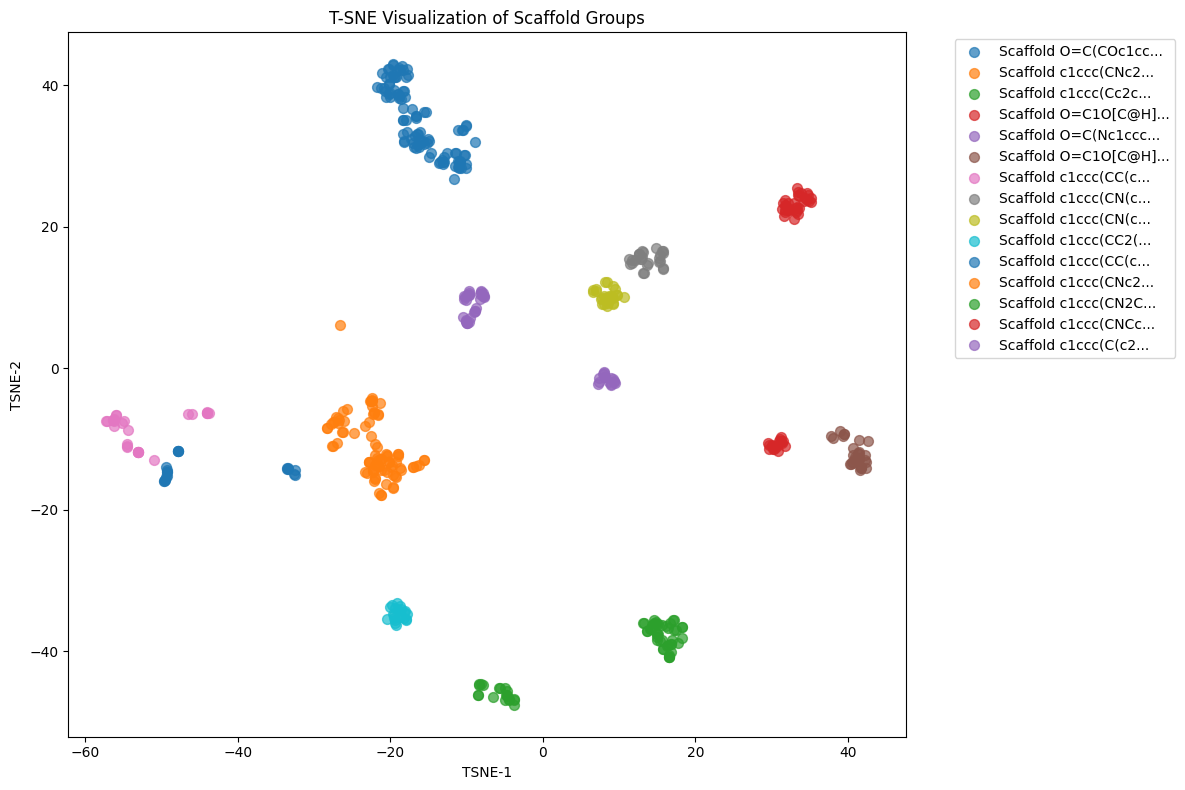


Top 5 Most Common Scaffolds:


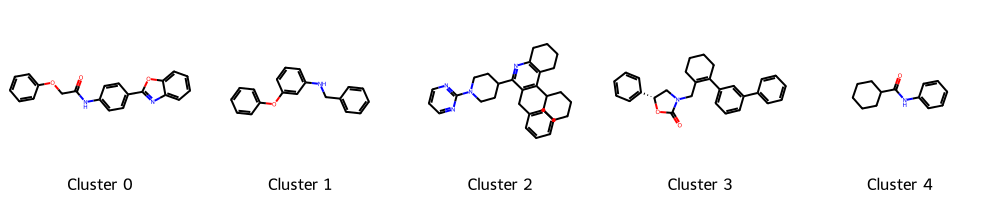


Scaffold Distribution in Splits:
Total unique scaffolds: 474
-> Training scaffolds: 379
-> Test scaffolds: 95

Sample Training Scaffolds:


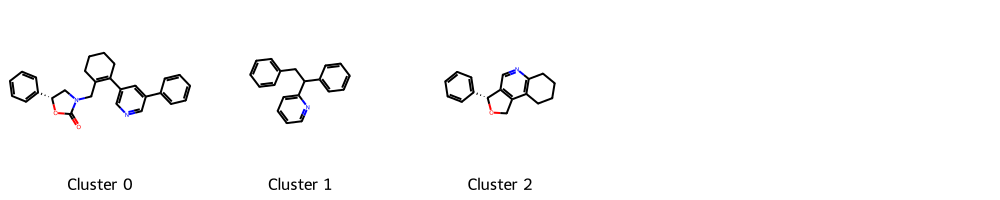


Sample Test Scaffolds:


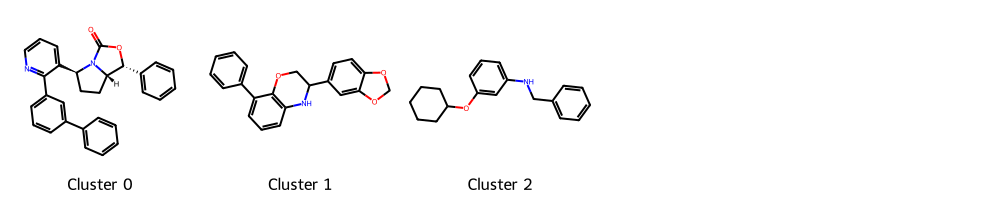

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from rdkit.Chem import Draw
import numpy as np

# 1. Prepare scaffold-based "clusters" for visualization
# Get unique scaffolds and assign cluster labels
unique_scaffolds = df['murcko_scaffold'].unique()
scaffold_to_label = {scaffold: i for i, scaffold in enumerate(unique_scaffolds)}
df['scaffold_cluster'] = df['murcko_scaffold'].map(scaffold_to_label)

# 2. T-SNE visualization of scaffold clusters (using your X_fused)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(X_fused)

plt.figure(figsize=(12, 8))

# Only show top N largest scaffolds for clarity
top_scaffolds = df['murcko_scaffold'].value_counts().index[:15]

for scaffold in top_scaffolds:
    mask = (df['murcko_scaffold'] == scaffold).values
    plt.scatter(tsne_results[mask, 0], tsne_results[mask, 1],
                label=f'Scaffold {scaffold[:10]}...',
                alpha=0.7, s=50)

plt.title("T-SNE Visualization of Scaffold Groups")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Visualize representative scaffolds
def draw_scaffold_grid(scaffold_list, n=5):
    """Draw a grid of scaffold structures"""
    samples = [Chem.MolFromSmiles(s) for s in scaffold_list[:n]]
    return Draw.MolsToGridImage(samples, molsPerRow=min(n,5),
                              subImgSize=(200,200),
                              legends=[f"Cluster {i}" for i in range(len(samples))])

# Show top scaffolds
print("\nTop 5 Most Common Scaffolds:")
display(draw_scaffold_grid(top_scaffolds.tolist()))

# 4. Scaffold distribution in train/test
print("\nScaffold Distribution in Splits:")
print(f"Total unique scaffolds: {len(unique_scaffolds)}")
print(f"-> Training scaffolds: {len(train_scaffolds)}")
print(f"-> Test scaffolds: {len(test_scaffolds)}")

# 5. Most common scaffolds in each set
train_top = pd.Series(train_scaffolds).value_counts().index[:3]
test_top = pd.Series(test_scaffolds).value_counts().index[:3]

print("\nSample Training Scaffolds:")
display(draw_scaffold_grid(train_top))

print("\nSample Test Scaffolds:")
display(draw_scaffold_grid(test_top))